# Regressão Linear simples do Zero 
### Laboratório da disciplina Aprendizagem de Máquina ministrada pelo professor Leandro Balby
### Aluno: Carlos Vinicius Alves Minervino

### Referências:

[Link da Atividade de laboratório](https://canvas.instructure.com/courses/5142637/assignments/31711946)

[Vídeo: How to Do Linear Regression using Gradient Descent](https://www.youtube.com/watch?v=XdM6ER7zTLk)

[Repositório no GitHub de Siraj Raval](https://github.com/llSourcell/linear_regression_live)

[Link do Dataset utilizado](https://canvas.instructure.com/courses/5142637/files/186498386?wrap=1)


In [1]:
import numpy as np

In [2]:
def compute_error_for_given_points(b, m, points):
  totalError = 0
  for i in range(0, len(points)):
    x = points[i,0]
    y = points[i,1]
    totalError += (y - (m*x+b))**2
  return  totalError / float(len(points))

In [3]:
def step_gradient(b_current, m_current, points, learning_rate):
  b_gradient = 0
  m_gradient = 0
  N = float(len(points))
  for i in range(0, len(points) ):
    x = points[i,0]
    y = points[i,1]
    b_gradient += (y-(m_current*x+b_current))
    m_gradient += x*(y-(m_current*x+b_current))
  b_gradient *= (-2/N)
  m_gradient *= (-2/N)
  new_b = b_current - learning_rate*b_gradient
  new_m = m_current - learning_rate*m_gradient
  return [new_b, new_m, compute_error_for_given_points(new_b, new_m, points)]

In [4]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations, silent=True):
  b = starting_b
  m = starting_m
  rss_list = []
  for i in range(num_iterations):
    b, m, rss = step_gradient(b, m, np.array(points), learning_rate)
    rss_list.append(rss)
    if silent is False:
      print('Iteração {} - RSS: {}'.format(i+1, rss))
  return [b, m, rss_list]

In [5]:
points = np.genfromtxt('https://raw.githubusercontent.com/llSourcell/linear_regression_live/master/data.csv', delimiter=',')

#hyperparameters
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 1000
[b, m, rss_list] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print('b =',b)
print('m =',m)

b = 0.08893651993741343
m = 1.4777440851894448


In [6]:
points.shape

(100, 2)

In [7]:
x_data = points[:,0]
y_data = points[:,1]
x0 = min(x_data)
y0 = m*x0+b
x1 = max(x_data)
y1 = m*x1+b

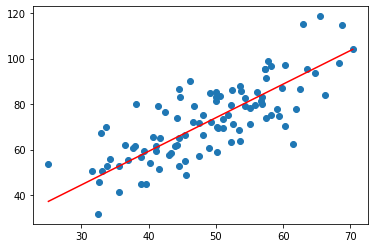

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x_data, y_data)
plt.plot([x0,x1], [y0,y1], color='red')

### Agora faremos o mesmo processo com os dados de Anos de Escolaridade vs Salário

In [9]:
dados_income = np.genfromtxt('https://raw.githubusercontent.com/viniciuscva/disciplinaAM/main/income.csv', delimiter=',')
#hyperparameters
learning_rate = 0.001
initial_b = 0
initial_m = 0
num_iterations = 10000
[b, m, rss_list] = gradient_descent_runner(dados_income, initial_b, initial_m, learning_rate, num_iterations)
print('b =',b)
print('m =',m)

b = -24.133020015450974
m = 4.687917174695901


In [10]:
x_data = dados_income[:,0]
y_data = dados_income[:,1]
x0 = min(x_data)
y0 = m*x0+b
x1 = max(x_data)
y1 = m*x1+b

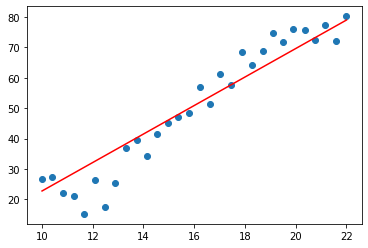

In [11]:
plt.scatter(x_data, y_data)
plt.plot([x0,x1], [y0,y1], color='red')

### Questão 1: Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente. Gere um plot mostrando o RSS (eixo y) por iteração (eixo x).

A saída de streaming foi truncada nas últimas 5000 linhas.
Iteração 5001 - RSS: 58.7902207048379
Iteração 5002 - RSS: 58.7847121969642
Iteração 5003 - RSS: 58.77920473681799
Iteração 5004 - RSS: 58.77369832419997
Iteração 5005 - RSS: 58.76819295891093
Iteração 5006 - RSS: 58.762688640751584
Iteração 5007 - RSS: 58.757185369522816
Iteração 5008 - RSS: 58.75168314502556
Iteração 5009 - RSS: 58.74618196706061
Iteração 5010 - RSS: 58.74068183542899
Iteração 5011 - RSS: 58.73518274993169
Iteração 5012 - RSS: 58.72968471036963
Iteração 5013 - RSS: 58.724187716543994
Iteração 5014 - RSS: 58.718691768255766
Iteração 5015 - RSS: 58.71319686530623
Iteração 5016 - RSS: 58.70770300749651
Iteração 5017 - RSS: 58.702210194627696
Iteração 5018 - RSS: 58.6967184265012
Iteração 5019 - RSS: 58.69122770291823
Iteração 5020 - RSS: 58.68573802368005
Iteração 5021 - RSS: 58.680249388588194
Iteração 5022 - RSS: 58.67476179744393
Iteração 5023 - RSS: 58.669275250048784
Iteração 5024 - RSS: 58.66378974620412
I

Text(0.5, 0, 'Iteração')

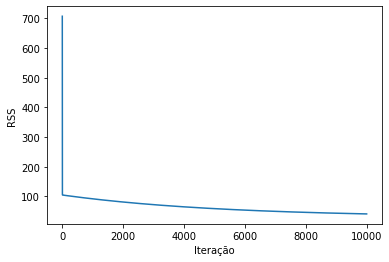

In [12]:
[b, m, rss_list] = gradient_descent_runner(dados_income, initial_b, initial_m, learning_rate, num_iterations, silent=False)

plt.plot(range(len(rss_list)), rss_list)
plt.ylabel('RSS')
plt.xlabel('Iteração')

### Questão 2: Teste valores pequenos, médios e grandes de alpha (learning rate). O que acontece com o RSS durante as iterações em cada caso? Por que?

Obs: Pelo código abaixo, e plots gerados, concluímos que se alpha é muito pequeno, leva-se muitas iterações para chegar no RSS mínimo, portanto deve-se aumentar alpha, porém se aumentar muito e passar do ponto, vemos que o gráfico não gera mais o RSS mínimo, pois o algoritmo diverge.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


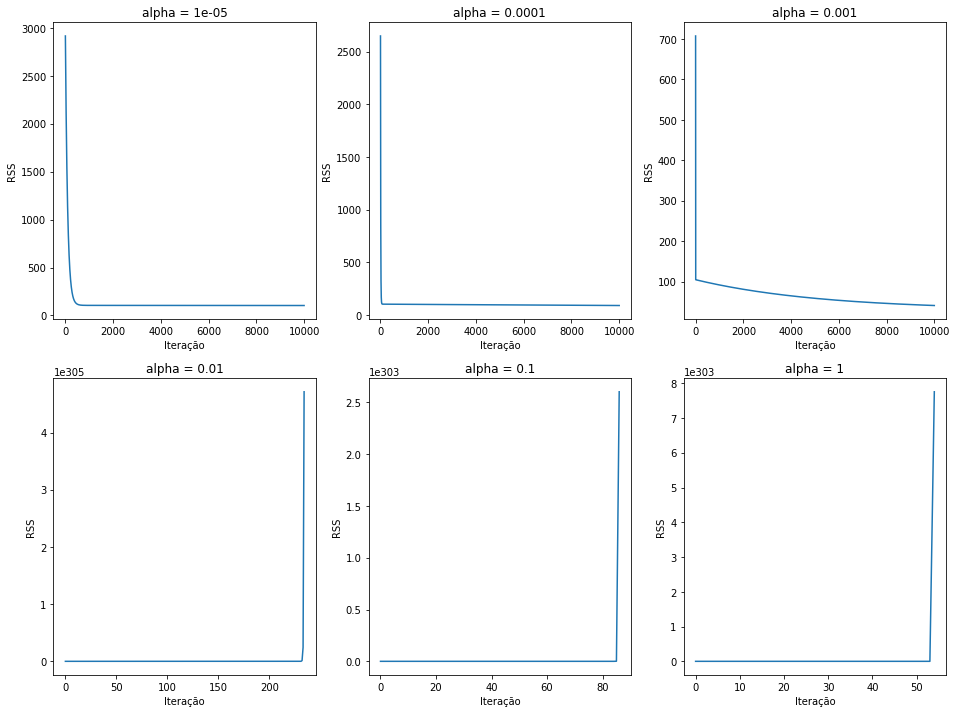

In [13]:
alpha_tries = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
plt.figure(figsize = (16, 12))
plt.title('RSS x Iteração para diferentes valores alfa')
for i,alpha in enumerate(alpha_tries):
  [b, m, rss_list] = gradient_descent_runner(dados_income, initial_b, initial_m, alpha, num_iterations)
  ax1 = plt.subplot(2,3,i+1)
  ax1.plot(range(len(rss_list)), rss_list)
  ax1.set_title('alpha = {}'.format(alpha))
  ax1.set(xlabel='Iteração', ylabel='RSS')

### Questão 3: Teste valores diferentes do número de iterações e alpha até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores

Consegui obter (b = -39.10519020198799, m = 5.579179883407752) . Com testes, consegui chegar próximo a esses valores usando alpha=0.001 e num_iterations=50000

In [14]:
print('Valores que queremos obter são: b = -39 e m = 5\n')

alpha_tries = [  0.0001,  0.001, 0.01]
num_iterations_tries = [10000, 50000]
bm_list = []
for i,alpha in enumerate(alpha_tries):
  for j,num_iterations in enumerate(num_iterations_tries):
    [b, m, rss_list] = gradient_descent_runner(dados_income, initial_b, initial_m, alpha, num_iterations)
    print('For alpha={} and num_iterations={}: '.format(alpha, num_iterations), 'b =', b, '; m =', m)
    bm_list.append((b,m))
print('\nMelhor parâmetros encontrados:',min(bm_list, key = lambda e: (e[0]+39)**2 + (e[1]-5)**2), '\n')




Valores que queremos obter são: b = -39 e m = 5

For alpha=0.0001 and num_iterations=10000:  b = -3.403329603440687 ; m = 3.453921047402366
For alpha=0.0001 and num_iterations=50000:  b = -14.808320353168808 ; m = 4.132836850642201
For alpha=0.001 and num_iterations=10000:  b = -24.133020015450974 ; m = 4.687917174695901
For alpha=0.001 and num_iterations=50000:  b = -39.10519020198799 ; m = 5.579179883407752


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


For alpha=0.01 and num_iterations=10000:  b = nan ; m = nan
For alpha=0.01 and num_iterations=50000:  b = nan ; m = nan

Melhor parâmetros encontrados: (-39.10519020198799, 5.579179883407752) 



### Questão 4: O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de tolerância que é comparado à norma do gradiente (como no algoritmo dos slides apresentados em sala). 

In [15]:
def step_gradient2(b_current, m_current, points, learning_rate):
  b_gradient = 0
  m_gradient = 0
  N = float(len(points))
  for i in range(0, len(points) ):
    x = points[i,0]
    y = points[i,1]
    b_gradient += (y-(m_current*x+b_current))
    m_gradient += x*(y-(m_current*x+b_current))
  b_gradient *= (-2/N)
  m_gradient *= (-2/N)
  new_b = b_current - learning_rate*b_gradient
  new_m = m_current - learning_rate*m_gradient
  norma_gradiente = (b_gradient**2 + m_gradient**2)**0.5
  return [new_b, new_m, compute_error_for_given_points(new_b, new_m, points), norma_gradiente]

def gradient_descent_runner2(points, starting_b, starting_m, learning_rate, max_iterations=10000, tolerancia=5, silent=True):
  b = starting_b
  m = starting_m
  rss_list = []
  i = 0
  norma_gradiente = 1000
  while norma_gradiente > tolerancia:
    i += 1
    if i>max_iterations:
      break
    b, m, rss, norma_gradiente = step_gradient2(b, m, np.array(points), learning_rate)
    rss_list.append(rss)
    if silent is False:
      print('Iteração {} - RSS: {}'.format(i+1, rss))
  print('Parou na iteração', i)
  return [b, m, rss_list, norma_gradiente]

b, m, rss_list, norma_gradiente = gradient_descent_runner2(dados_income, 0, 0, learning_rate=0.001, max_iterations=100000, tolerancia=0.1, silent=True)
print('b =',b,'; m =',m,'; norma =',norma_gradiente)

Parou na iteração 38183
b = -38.396838748915414 ; m = 5.537013168301005 ; norma = 0.09999146137378152


### Questão 5: Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?

R= O valor de tolerância para norma do vetor, que permite encontrar os melhores parâmetros b,m foi em torno de Tolerância = 0.1

In [16]:
# R= O valor de tolerância para norma do vetor, que permite encontrar os melhores parâmetros b,m foi em torno de Tolerância = 0.1

### Questão 6: Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.

In [17]:
def optimize_by_normal_equations(points):
  x_values = points[:,0]
  y_values = points[:,1]
  x_avg = x_values.mean()
  y_avg = y_values.mean()
  x_diffs = [x - x_avg for x in list(x_values)]
  y_diffs = [y - y_avg for y in list(y_values)]
  best_m = sum([x_diffs[i]*y_diffs[i] for i in range(len(x_diffs))])/sum([k*k for k in x_diffs])
  best_b = y_avg - best_m * x_avg
  return best_b, best_m

b, m = optimize_by_normal_equations(dados_income)
print('b =',b,'; m =',m)

b = -39.446256679096194 ; m = 5.59948287411992


In [18]:
# COMPARAR TEMPOS DE PROCESSAMENTO

In [19]:
from time import time

print('With gradient descent:')
t0 = time()
b, m, rss_list = gradient_descent_runner(dados_income, 0, 0, learning_rate=0.001, num_iterations=50000, silent=True)
print('b =',b,'; m =',m)
print('Time spent:',time()-t0,'seconds.')

print('\nWith normal equations:')
t0 = time()
b, m = optimize_by_normal_equations(dados_income)
print('b =',b,'; m =',m)
print('Time spent:',time()-t0,'seconds.')

With gradient descent:
b = -39.10519020198799 ; m = 5.579179883407752
Time spent: 4.602965831756592 seconds.

With normal equations:
b = -39.446256679096194 ; m = 5.59948287411992
Time spent: 0.0034017562866210938 seconds.
